In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [71]:
data = pd.read_csv("standardized.csv")
data = data.dropna(subset=["production_countries", "weighted_average_popularity"])
country_data = pd.DataFrame(columns = ['country', 'popularity'])
country_dict = {}

# iterate over the rows to find the all popularity for each country 
for index, row in data.iterrows():
    countries = row["production_countries"]
    popularity = row["weighted_average_popularity"]
    countries = eval(countries)
    
    for i in range(len(countries)):
        country = countries[i]

        if country not in country_dict:
            country_dict[country] = [popularity]
        else:
            country_dict[country].append(popularity)

        country_data = pd.concat([country_data, pd.DataFrame({'country': [country], 'popularity': [popularity]})], ignore_index = True)
        i += 1

country_data.to_csv("country.csv", index = False)

In [72]:
data = pd.read_csv("country.csv")
data = data.dropna(subset = ["country", "popularity"])

# discreate the popularity
data["range"] = pd.cut(data["popularity"], bins=3, labels=['low', 'mediate', "high"])
countries = data[["country"]].copy()
popularity = data["range"]

# convert the type to category
countries["country"] = countries["country"].astype("category")

# calculate mutual information of discreate variables
mi = mutual_info_classif(X=countries, y=popularity, discrete_features=True)
print(mi)                                   

[0.12649839]


There is weak relationship between the number of movie that country release and the popularity of the movie

('BS', 0.79)
25    1
Name: num_release, dtype: object
('MT', 0.7)
27    2
Name: num_release, dtype: object
('MC', 0.7)
94    1
Name: num_release, dtype: object


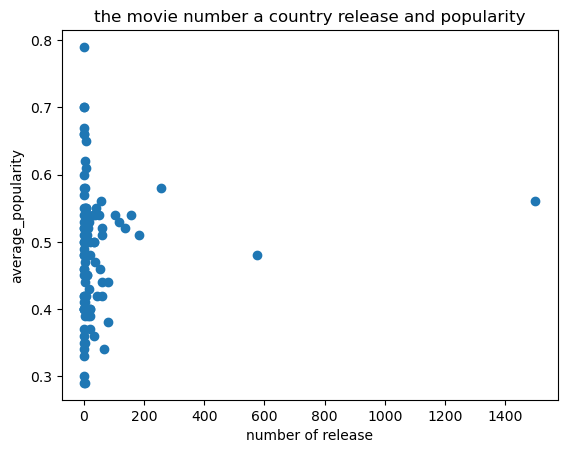

In [73]:
num_relation_data = pd.DataFrame(columns = ['country', 'num_release', 'popularity'])
population_dict = {}

# calculate the average popularity and number of movie a country release
for country, popularity in country_dict.items():
    num = len(popularity)
    average = np.round(sum(popularity)/len(popularity),2)
    num_relation_data = pd.concat([num_relation_data, pd.DataFrame({'country': [country], 'num_release': [num], 'popularity': [average]})], ignore_index = True)
    population_dict[country] = average

sorted_dict = sorted(population_dict.items(), key = lambda x: (x[1]), reverse = True)

for i in range(3):
    print(sorted_dict[i])
    print(num_relation_data[num_relation_data["country"] == sorted_dict[i][0]]['num_release'])

# plot the relationship between number of movies a country release and its popularity
plt.scatter(x = num_relation_data['num_release'], y = num_relation_data['popularity'])
plt.xlabel("number of release")
plt.ylabel("average_popularity")
plt.title("the movie number a country release and popularity")
plt.show()